In [44]:
import numpy as np
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from itertools import cycle
from sklearn.decomposition import PCA


In [45]:
all_data = [[1,0,0],[1,1,0],[0,1,0],[0,0,1]] ; sd = .5 ; n = 500 ;random_seed = 1
# (100,010,001,110)

In [46]:
def make_data3(data_list,sd,n):
    
    X = np.zeros([3,n])
    i = 0
    data_pro = [] 
    for d in data_list :
        X[i,0:n] = np.random.normal(d,sd,int(n))
        i += 1 
        
    return X 

def plot3d(all_data,sd,n) :
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    cycol = cycle('bgrcmk')
    i = 0 
    size_all = len(all_data) ; size_data =len(all_data[0])
    data = np.zeros([size_all,n,size_data])
    for data_list in all_data :
        X = make_data3(data_list,sd,n)
        ax.scatter(X[0],X[1],X[2], c = next(cycol) , marker = 'o')
        data[i] = X.T
        i += 1
    ax.set_title('Psk (100,010,001,110) With Noise')
    ax.set_xlabel('100')
    ax.set_ylabel('010')
    ax.set_zlabel('001')
    plt.show()

    return data

def plotPCA(data,all_data) :
    
    fig = plt.figure(figsize = (8,8))
    cycol = cycle('bgrcmk')
    pca = PCA(2)
    Data = mergeData(data) 
    data_pca = pca.fit_transform(Data)
    j = len(data[0])
    start = 0 
    for i in range(len(data)) :
        stop = (i+1)*j
        plt.scatter(data_pca[start:stop,0],data_pca[start:stop,1], c = next(cycol),label = str(all_data[i]))
        start += j
    plt.title('Principal Component Analysis')
    plt.xlabel('Principle Component 1')
    plt.ylabel('Principle Component 2')
    plt.legend()
    plt.show()
    
    return

def plotTSNE(data,all_data,random_seed) :
    
    tsne = TSNE(n_components = 2,random_state = random_seed)
    cycol = cycle('bgrcmk')
    plt.figure(figsize = (8,8))
    j = len(data[0])
    start = 0 
    Data = mergeData(data) 
    data_tsne = tsne.fit_transform(Data)
    for i in range(len(data)):
        stop = (i+1)*j
        plt.scatter(data_tsne[start:stop,0],data_tsne[start:stop,1], c = next(cycol),label = str(all_data[i]))
        start += j
    plt.legend()
    plt.show()
    
    return


def mergeData(data) :
    
    Data = data[0]
    for i in range(len(data)-1) :
        Data = np.vstack((Data,data[i+1]))
        
    return Data



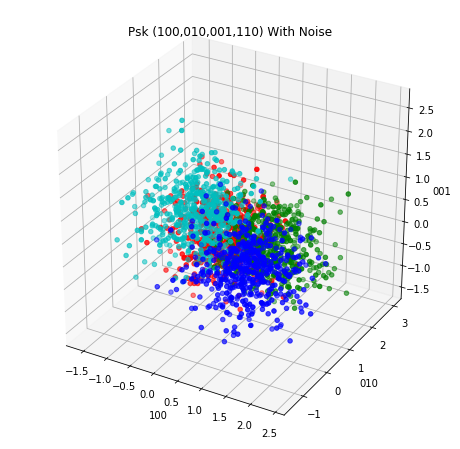

In [47]:
data = plot3d(all_data,sd,n)

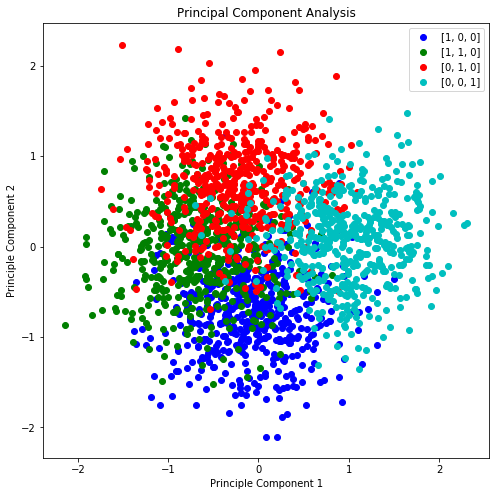

In [48]:
plotPCA(data,all_data)

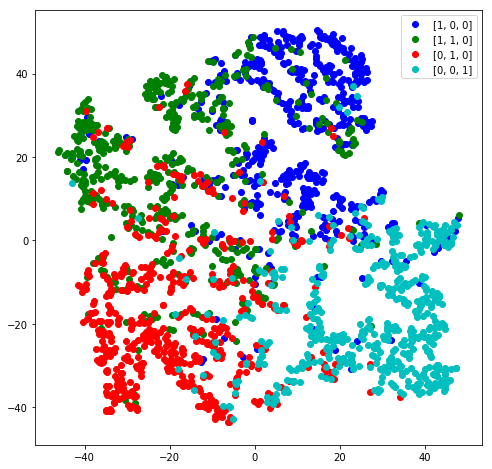

In [49]:
plotTSNE(data,all_data,random_seed)